Import libraries

In [4]:
import xlrd
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt


Read the dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


customer_demo = pd.read_excel('Raw data.xlsx', sheet_name='CustomerDemographic')
customer_address = pd.read_excel('Raw data.xlsx', sheet_name='CustomerAddress')
transaction_data = pd.read_excel('Raw data.xlsx', sheet_name='Transaction')

<ipython-input-5-16822b670c68>:7: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  customer_demo = pd.read_excel('Raw data.xlsx', sheet_name='CustomerDemographic')


Cleaning dataset

In [6]:
customer_demo = customer_demo.drop(['first_name', 'last_name', 'default', 'job_title'], axis=1)
customer_demo['gender'].replace(['F', 'Femal'], 'Female', inplace=True)
customer_demo['gender'].replace('M', 'Male', inplace=True)
customer_demo['gender'].replace('U', 'Unknown', inplace=True)
customer_demo['deceased_indicator'].replace(['N'], 0, inplace=True)
customer_demo['deceased_indicator'].replace(['Y'], 1, inplace=True)
customer_demo['owns_car'].replace('Yes', 1, inplace=True)
customer_demo['owns_car'].replace('No', 0, inplace=True)
customer_demo = customer_demo[customer_demo['DOB'] != customer_demo.DOB.min()]
customer_demo[customer_demo['deceased_indicator'] == 0]
customer_demo = customer_demo.drop(['deceased_indicator'], axis=1)
customer_demo_clean = customer_demo.dropna()
customer_demo_clean.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure
1,66,Male,46,2002-03-11,Argiculture,High Net Worth,0,1.0
2,1888,Female,67,2002-01-26,Health,Mass Customer,1,1.0
5,422,Male,78,2002-01-06,Manufacturing,Affluent Customer,0,1.0
6,2296,Female,16,2002-01-01,Retail,Affluent Customer,0,1.0
7,470,Male,22,2001-12-19,Retail,Mass Customer,0,1.0


calculate age from dob

In [7]:
import datetime as dt
import numpy as np
customer_demo_clean['age'] = (dt.datetime.now() - customer_demo_clean['DOB']) / np.timedelta64(1, 'Y')
customer_demo_clean['age_class'] = ((round(customer_demo_clean['age'] / 10)) * 10).astype(int)
customer_demo_clean.head()


<ipython-input-7-e735469af873>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_demo_clean['age'] = (dt.datetime.now() - customer_demo_clean['DOB']) / np.timedelta64(1, 'Y')
<ipython-input-7-e735469af873>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_demo_clean['age_class'] = ((round(customer_demo_clean['age'] / 10)) * 10).astype(int)


,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class
1,66,Male,46,2002-03-11,Argiculture,High Net Worth,0,1.0,21.189346,20
2,1888,Female,67,2002-01-26,Health,Mass Customer,1,1.0,21.309814,20
5,422,Male,78,2002-01-06,Manufacturing,Affluent Customer,0,1.0,21.364573,20
6,2296,Female,16,2002-01-01,Retail,Affluent Customer,0,1.0,21.378262,20
7,470,Male,22,2001-12-19,Retail,Mass Customer,0,1.0,21.413855,20


In [8]:
customer_address['state'].replace('New South Wales', 'NSW', inplace=True)
customer_address['state'].replace('Victoria', 'VIC', inplace=True)
customer_address_clean = customer_address.dropna()
customer_address_clean.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


Merge customer demographics and customer address dataset

In [9]:
customer_data = pd.merge(customer_demo_clean, customer_address_clean, left_index=True, right_index=True)
customer_data= customer_data.dropna()
customer_data.head()

,customer_id_x,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class,customer_id_y,address,postcode,state,country,property_valuation
1,66,Male,46,2002-03-11,Argiculture,High Net Worth,0,1.0,21.189346,20,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,1888,Female,67,2002-01-26,Health,Mass Customer,1,1.0,21.309814,20,4,0 Holy Cross Court,4211,QLD,Australia,9
5,422,Male,78,2002-01-06,Manufacturing,Affluent Customer,0,1.0,21.364573,20,7,4 Delaware Trail,2210,NSW,Australia,9
6,2296,Female,16,2002-01-01,Retail,Affluent Customer,0,1.0,21.378262,20,8,49 Londonderry Lane,2650,NSW,Australia,4
7,470,Male,22,2001-12-19,Retail,Mass Customer,0,1.0,21.413855,20,9,97736 7th Trail,2023,NSW,Australia,12


sort transaction data based on customer_id

In [10]:
# txns_df = pd.read_excel(file_name, header=1, sheet_name='Transactions', index_col=0)
transaction_data = transaction_data.sort_values('customer_id')
transaction_data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Check
14485,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-05,1.0
18969,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-09,1.0
16422,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-05,1.0
5156,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21,1.0
13423,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09,1.0


In [11]:
transaction_data.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
Check                        3
dtype: int64

In [12]:
transaction_data.duplicated().sum()

0

In [13]:
transaction_data.shape

(20000, 14)

In [14]:
# transaction_data['product_first_sold_date'] = pd.to_timedelta(transaction_data['product_first_sold_date'], unit='d') + pd.Timestamp('1900-01-01')
transaction_data.head()


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Check
14485,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-05,1.0
18969,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-09,1.0
16422,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-05,1.0
5156,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21,1.0
13423,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09,1.0


clean transaction dataset

In [15]:
transaction_data_clean = transaction_data.dropna()
transaction_data_clean.shape

(19442, 14)

In [16]:
transaction_data_clean['transaction_date'].describe(datetime_is_numeric=True)

count                            19442
mean     2017-07-01 16:38:56.055961344
min                2017-01-01 00:00:00
25%                2017-04-01 00:00:00
50%                2017-07-03 00:00:00
75%                2017-10-02 00:00:00
max                2017-12-30 00:00:00
Name: transaction_date, dtype: object

calculate most recent purchase date

In [17]:
most_recent_purchase = transaction_data_clean['transaction_date'].max()
transaction_data_clean['last_purchase_days_ago'] = most_recent_purchase - transaction_data_clean['transaction_date']
transaction_data_clean['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
transaction_data_clean['profit'] = transaction_data_clean['list_price'] - transaction_data_clean['standard_cost']
transaction_data_clean.head()

<ipython-input-17-f74604c9361b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_data_clean['last_purchase_days_ago'] = most_recent_purchase - transaction_data_clean['transaction_date']
<ipython-input-17-f74604c9361b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_data_clean['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
<ipython-input-17-f74604c9361b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Check,last_purchase_days_ago,profit
14485,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-05,1.0,278.0,75.75
18969,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-09,1.0,276.0,509.97
16422,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-05,1.0,21.0,75.14
5156,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21,1.0,233.0,189.28
13423,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09,1.0,312.0,17.87


The transaction_data_clean DataFrame now includes the 'last_purchase_days_ago' and 'profit' columns, which provide information about the recency of the last purchase and the profitability of each transaction, respectively.

Filtering by recency.

In [18]:
transaction_data_clean[transaction_data_clean['last_purchase_days_ago'] > 365].shape

(0, 16)

Calculating RFM metrics for each customer.

In [19]:
rfmTable = transaction_data_clean.groupby('customer_id').agg({
    'last_purchase_days_ago': lambda x: x.min(),
    'customer_id': lambda x: len(x),
    'profit': lambda x: x.sum()
})

rfmTable.rename(columns={
    'last_purchase_days_ago': 'recency', 
    'customer_id': 'frequency', 
    'profit': 'monetary_value'
    }, inplace=True
)


It provides insights into the recency, frequency, and monetary value of customer purchases.

Recency: This represents the number of days since each customer's most recent 
purchase. A lower value indicates that a customer has made a purchase more recently, which is generally a positive indicator.

Frequency: This indicates the number of transactions made by each customer. It reflects how often a customer engages in purchasing from the company.

Monetary Value: This metric represents the total monetary value of all transactions made by each customer. It gives an idea of how much a customer contributes to the company's revenue.

By analyzing the rfmTable, we can identify valuable customer segments. For example, customers with a low recency value, high frequency, and high monetary value are considered highly engaged and valuable to the company. On the other hand, customers with a high recency value, low frequency, and low monetary value might require further attention to improve their engagement and increase their value to the company.

In [20]:
rfmTable.head()

,recency,frequency,monetary_value
customer_id,,,
1,7.0,11,3018.09
2,128.0,3,2226.26
3,102.0,7,3290.21
4,195.0,2,220.57
5,16.0,6,2394.94


In [21]:
rfmTable.shape

(3491, 3)

Calculating quartiles for RFM metrics.

In [22]:
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])
quartiles

,recency,frequency,monetary_value
0.25,18.0,4.0,1797.95
0.50,45.0,5.0,2799.26
0.75,88.0,7.0,4123.10


The resulting quartiles DataFrame provides insights into the distribution of customer behavior metrics. For each metric, it displays the corresponding values at the 25th, 50th, and 75th percentiles. These values can be used to further analyze and segment customers

 categorizes continuous variables based on quartile ranges for analysis.

In [23]:
def ROneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 4
    
def FMOneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 1

Assigns RFM scores to each customer for segmentation.

In [24]:
rfmSeg = rfmTable
rfmSeg['r_score'] = rfmSeg['recency'].apply(ROneHotEncoder, args=('recency', quartiles))
rfmSeg['f_score'] = rfmSeg['frequency'].apply(FMOneHotEncoder, args=('frequency', quartiles))
rfmSeg['m_score'] = rfmSeg['monetary_value'].apply(FMOneHotEncoder, args=('monetary_value', quartiles))
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score
customer_id,,,,,,
1,7.0,11,3018.09,1,1,3
2,128.0,3,2226.26,4,4,2
3,102.0,7,3290.21,4,3,3
4,195.0,2,220.57,4,4,4
5,16.0,6,2394.94,1,3,2


Calculates RFM class and total score for each customer.

In [25]:
rfmSeg['rfm_class'] = 100 * rfmSeg['r_score'] + 10 * rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg['total_score'] = rfmSeg['r_score'] + rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score
customer_id,,,,,,,,
1,7.0,11,3018.09,1,1,3,113,5
2,128.0,3,2226.26,4,4,2,442,10
3,102.0,7,3290.21,4,3,3,433,10
4,195.0,2,220.57,4,4,4,444,12
5,16.0,6,2394.94,1,3,2,132,6


Customers with lower recency scores (1 in this case) indicate that they made a purchase more recently.
Customers with higher frequency scores (3 in this case) made more frequent purchases.
Customers with higher monetary value scores (3 in this case) spent more money.

The RFM class combines the individual scores of recency, frequency, and monetary value into a three-digit code.The RFM class provides a concise representation of a customer's engagement level and value.

The total score represents the sum of the individual scores of recency, frequency, and monetary value.



Calculates quartiles for RFM class values.

In [27]:
rfm_quartiles = (rfmSeg['rfm_class'].quantile(q=0.25),
                 rfmSeg['rfm_class'].median(), 
                 rfmSeg['rfm_class'].quantile(q=0.75))

print(rfm_quartiles)

(144.0, 244.0, 344.0)


Assigns customer title based on RFM class.

In [28]:
def RFMClassOneHotEncoder(x, d):
    if x <= d:
        return 'gold'
    else:
        return 'basic'

rfm_quartile = rfmSeg['rfm_class'].quantile(0.5)
rfmSeg['customer_title'] = rfmSeg['rfm_class'].apply(RFMClassOneHotEncoder, args=(rfm_quartile,))


create a new column called 'customer_title'. The values in this column are assigned based on whether the corresponding RFM class score is less than or equal to the median value (rfm_quartile). If it is, the value is set to 'gold'; otherwise, it is set to 'basic'

Merges RFM data with customer demographic data.

In [29]:
addr_demo_txns = pd.merge(rfmSeg, customer_data, left_index=True, right_index=True)
addr_demo_txns.columns

Index(['recency', 'frequency', 'monetary_value', 'r_score', 'f_score',
       'm_score', 'rfm_class', 'total_score', 'customer_title',
       'customer_id_x', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'age',
       'age_class', 'customer_id_y', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

EDA

Visualize the count of customers for each customer title.

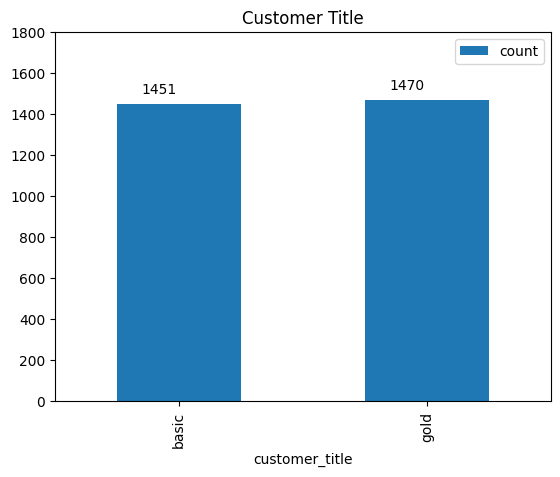

In [30]:
customer_titles_df = addr_demo_txns.groupby('customer_title').agg({
    'rfm_class': lambda x: len(x)
})
customer_titles_df.rename(columns={'rfm_class': 'count'}, inplace=True)
customer_titles_df.sort_values('count').plot(kind='bar')
for i, v in enumerate(customer_titles_df.sort_values('count')['count']):
    plt.text(i - .15, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1800])
plt.title('Customer Title')
plt.show()

visualize the wealth segment distribution with age

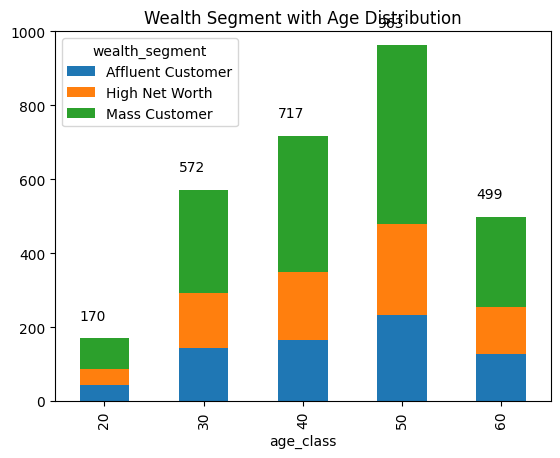

In [31]:
addr_demo_txns.groupby('age_class')['wealth_segment'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class') \
                      .agg({'wealth_segment': lambda x: len(x)})['wealth_segment']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Wealth Segment with Age Distribution')
plt.show()

visualize the gender distribution with age

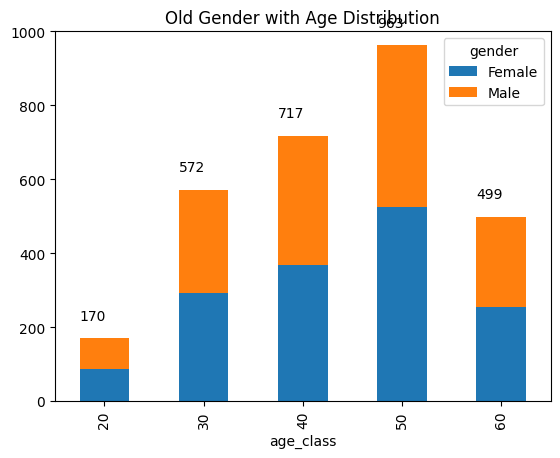

In [32]:
addr_demo_txns.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Old Gender with Age Distribution')
plt.show()

visualizes the customer title distribution with age

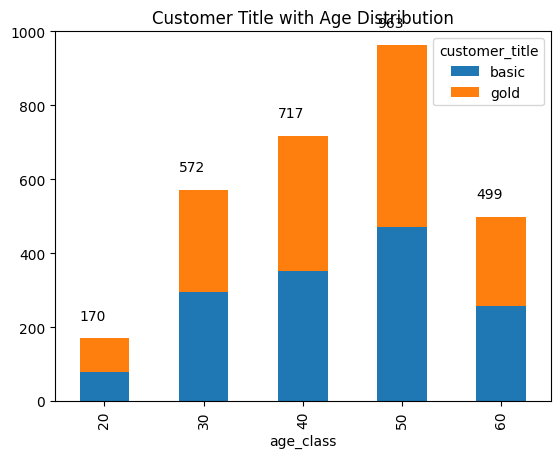

In [33]:
addr_demo_txns.groupby('age_class')['customer_title'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class') \
                      .agg({'customer_title': lambda x: len(x)})['customer_title']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Customer Title with Age Distribution')
plt.show()

visualize the wealth segment distribution with gender

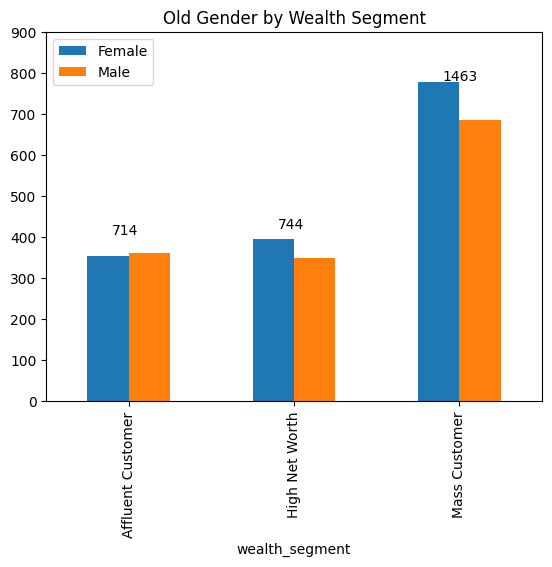

In [34]:
addr_demo_txns.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Old Gender by Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

Bar chart showing car ownership by state.

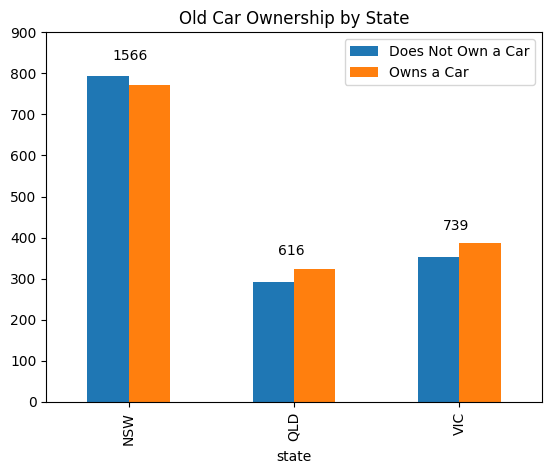

In [35]:
addr_demo_txns.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('state') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Old Car Ownership by State')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

bar chart showing car ownership by job industry

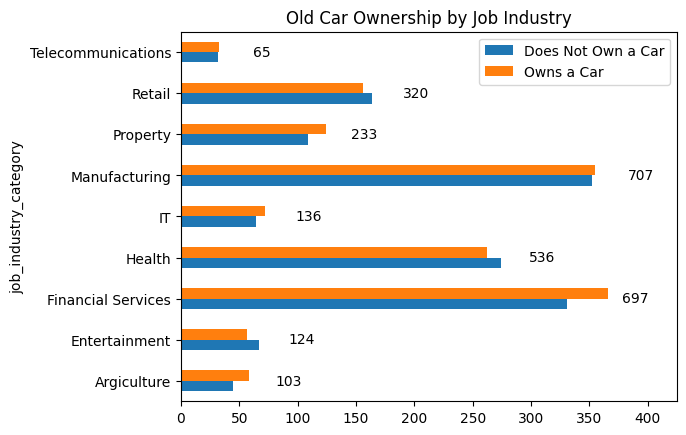

In [36]:
addr_demo_txns.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 30, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,425])
plt.title('Old Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

Bar chart showing the distribution of customer titles by state

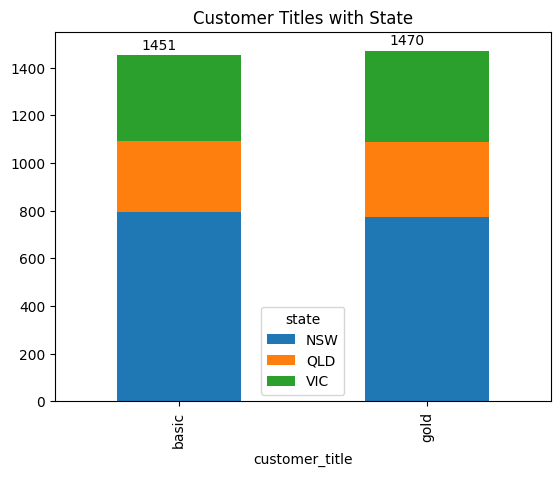

In [37]:
addr_demo_txns.groupby('customer_title')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('customer_title') \
                      .agg({'state': lambda x: len(x)})['state']):
    plt.text(i - .15, v + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1550])
plt.title('Customer Titles with State')
plt.show()

 count of customers based on their titles:

In [38]:
c = addr_demo_txns.groupby('customer_title').agg({'age': lambda x: len(x)})
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

,count
customer_title,
basic,1451
gold,1470


In [39]:
addr_demo_txns.shape

(2921, 25)

In [40]:

addr_demo_txns.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,customer_id_x,...,owns_car,tenure,age,age_class,customer_id_y,address,postcode,state,country,property_valuation
1,7.0,11,3018.09,1,1,3,113,5,gold,66,...,0,1.0,21.189346,20,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,128.0,3,2226.26,4,4,2,442,10,basic,1888,...,1,1.0,21.309814,20,4,0 Holy Cross Court,4211,QLD,Australia,9
5,16.0,6,2394.94,1,3,2,132,6,gold,422,...,0,1.0,21.364573,20,7,4 Delaware Trail,2210,NSW,Australia,9
6,64.0,5,3946.55,3,2,3,323,8,basic,2296,...,0,1.0,21.378262,20,8,49 Londonderry Lane,2650,NSW,Australia,4
7,253.0,3,220.11,4,4,4,444,12,basic,470,...,0,1.0,21.413855,20,9,97736 7th Trail,2023,NSW,Australia,12


In [41]:
addr_demo_txns.columns


Index(['recency', 'frequency', 'monetary_value', 'r_score', 'f_score',
       'm_score', 'rfm_class', 'total_score', 'customer_title',
       'customer_id_x', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'age',
       'age_class', 'customer_id_y', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

Selecting Important features

In [42]:
# Select relevant features for modeling
selected_features = ['customer_title','gender', 'past_3_years_bike_related_purchases', 'job_industry_category',
                     'wealth_segment', 'owns_car', 'tenure', 'age','state']
# recency', 'frequency', 'monetary_value', 'r_score', 'f_score', 'm_score', 'total_score', 'customer_title'
# Filter the merged dataset to include only selected features
model_data = addr_demo_txns[selected_features].copy()

# Handle categorical variables by one-hot encoding
model_data = pd.get_dummies(model_data, columns=['gender', 'job_industry_category',
                                                 'wealth_segment', 'owns_car', 'state'])

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Separate the target variable (customer_title) from the features
X = model_data.drop('customer_title', axis=1)
y = model_data['customer_title']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Model selection

In [43]:
# Import the necessary libraries for building the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       basic       0.48      0.48      0.48       283
        gold       0.51      0.51      0.51       302

    accuracy                           0.50       585
   macro avg       0.50      0.50      0.50       585
weighted avg       0.50      0.50      0.50       585



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
# Import the necessary libraries for building the model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Initialize the Gradient Boosting classifier
model = GradientBoostingClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       basic       0.49      0.51      0.50       283
        gold       0.52      0.50      0.51       302

    accuracy                           0.51       585
   macro avg       0.51      0.51      0.51       585
weighted avg       0.51      0.51      0.51       585



In [45]:
# !pip install xgboost

In [46]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the XGBoost classifier
model = XGBClassifier()

# Train the model on the training data
model.fit(X_train, y_train_encoded)

# Make predictions on the testing data
y_pred_encoded = model.predict(X_test)

# Decode the predicted labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

       basic       0.48      0.48      0.48       283
        gold       0.51      0.51      0.51       302

    accuracy                           0.50       585
   macro avg       0.50      0.50      0.50       585
weighted avg       0.50      0.50      0.50       585



In [47]:
# Import the necessary libraries for building the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the random forest classifier
model = RandomForestClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

       basic       0.49      0.52      0.50       283
        gold       0.53      0.50      0.51       302

    accuracy                           0.51       585
   macro avg       0.51      0.51      0.51       585
weighted avg       0.51      0.51      0.51       585



We select Randomforest as it gives more accuracy than other models

Prediction on new dataset

Reading the dataset

In [48]:
import pandas as pd

# Load the dataset from CSV
new_customer_data =pd.read_excel('Raw data.xlsx', sheet_name='NewCustomerList')

<ipython-input-48-74008361df5a>:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  new_customer_data =pd.read_excel('Raw data.xlsx', sheet_name='NewCustomerList')


In [49]:
new_customer_data.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.61,0.7625,0.953125,0.810156,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.112500,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.84,0.8400,0.840000,0.840000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.82,1.0250,1.025000,1.025000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.92,0.9200,1.150000,1.150000,4,4,1.703125


cleaning new dataset

In [50]:
new_customer_data = new_customer_data.drop(['first_name', 'last_name','job_title'], axis=1)
new_customer_data['gender'].replace(['F', 'Femal'], 'Female', inplace=True)
new_customer_data['gender'].replace('M', 'Male', inplace=True)
new_customer_data['gender'].replace('U', 'Unknown', inplace=True)
new_customer_data['deceased_indicator'].replace(['N'], 0, inplace=True)
new_customer_data['deceased_indicator'].replace(['Y'], 1, inplace=True)
new_customer_data['owns_car'].replace('Yes', 1, inplace=True)
new_customer_data['owns_car'].replace('No', 0, inplace=True)
new_customer_data = new_customer_data[new_customer_data['DOB'] != new_customer_data.DOB.min()]
new_customer_data[new_customer_data['deceased_indicator'] == 0]
new_customer_data = new_customer_data.drop(['deceased_indicator'], axis=1)
new_customer_data_clean = new_customer_data.dropna()
new_customer_data_clean.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Male,86,1957-07-12,Manufacturing,Mass Customer,1,14,45 Shopko Center,4500,QLD,Australia,6,0.61,0.7625,0.953125,0.810156,1,1,1.718750
1,Male,69,1970-03-22,Property,Mass Customer,0,16,14 Mccormick Park,2113,NSW,Australia,11,0.89,0.8900,1.112500,0.945625,1,1,1.718750
2,Female,10,1974-08-28,Financial Services,Affluent Customer,0,10,5 Colorado Crossing,3505,VIC,Australia,5,0.84,0.8400,0.840000,0.840000,1,1,1.718750
3,Female,64,1979-01-28,Manufacturing,Affluent Customer,1,5,207 Annamark Plaza,4814,QLD,Australia,1,0.82,1.0250,1.025000,1.025000,4,4,1.703125
4,Female,34,1965-09-21,Financial Services,Affluent Customer,0,19,115 Montana Place,2093,NSW,Australia,9,0.92,0.9200,1.150000,1.150000,4,4,1.703125


In [51]:
new_customer_data_clean.columns

Index(['gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'address', 'postcode', 'state', 'country', 'property_valuation',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [52]:
# Drop unnecessary columns
new_customer_data_clean = new_customer_data_clean.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18','Unnamed: 19','Unnamed: 20'], axis=1)

# Rename columns to match the training data
new_customer_data_clean = new_customer_data_clean.rename(columns={'date_of_birth': 'DOB', 'rank': 'Rank'})


In [53]:
import datetime as dt
import numpy as np
new_customer_data_clean['age'] = (dt.datetime.now() - new_customer_data_clean['DOB']) / np.timedelta64(1, 'Y')
new_customer_data_clean['age_class'] = ((round(new_customer_data_clean['age'] / 10)) * 10).astype(int)
new_customer_data_clean.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,age_class
0,Male,86,1957-07-12,Manufacturing,Mass Customer,1,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,65.852824,70
1,Male,69,1970-03-22,Property,Mass Customer,0,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,53.159887,50
2,Female,10,1974-08-28,Financial Services,Affluent Customer,0,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,48.724478,50
3,Female,64,1979-01-28,Manufacturing,Affluent Customer,1,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,44.305496,40
4,Female,34,1965-09-21,Financial Services,Affluent Customer,0,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,57.658268,60


prediction

In [54]:
# Select relevant features for modeling
selected_features_new = [ 'gender', 'past_3_years_bike_related_purchases', 'job_industry_category',
                         'wealth_segment', 'owns_car', 'tenure', 'state','age']

# Filter the new dataset to include only selected features
new_data_filtered = new_customer_data_clean[selected_features_new].copy()

# Handle categorical variables by one-hot encoding
new_data_encoded = pd.get_dummies(new_data_filtered, columns=['gender', 'job_industry_category',
                                                              'wealth_segment', 'owns_car', 'state'])

# Perform any necessary preprocessing or scaling on the new dataset

# Make predictions on the new dataset using the trained model
predictions = model.predict(new_data_encoded)

# Add the predictions to the new dataset
new_customer_data_clean['customer_title'] = predictions

# Sort the new dataset based on the predicted customer title and select the top 1000 customers
best_customers = new_customer_data_clean.sort_values(by='customer_title', ascending=False).head(1000)

# Print the selected best customers
print(best_customers)


     gender  past_3_years_bike_related_purchases        DOB  \
0      Male                                   86 1957-07-12   
557    Male                                   46 1994-02-04   
554  Female                                   79 1995-10-01   
552    Male                                   12 1999-04-21   
550  Female                                   34 1979-01-03   
..      ...                                  ...        ...   
190  Female                                   32 1992-03-27   
570  Female                                   53 1968-07-29   
191    Male                                   55 1938-10-16   
566  Female                                   17 1964-03-14   
511    Male                                   57 1999-05-14   

    job_industry_category     wealth_segment  owns_car  tenure  \
0           Manufacturing      Mass Customer         1      14   
557         Manufacturing     High Net Worth         0      13   
554    Financial Services     High Net Worth 

Save the values in excel

In [55]:
!pip install xlsxwriter

writer = pd.ExcelWriter('BEST.xlsx',
                        engine = 'xlsxwriter')
new_customer_data_clean.to_excel(writer, sheet_name = 'Dataset')
best_customers.to_excel(writer, sheet_name = 'Top 1000')
writer.save()
writer.close()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.7/152.7 kB 5.4 MB/s eta 0:00:00


<ipython-input-55-d0e0ae0d3bbf>:7: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
/usr/local/lib/python3.10/dist-packages/xlsxwriter/workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


this is next code